<a href="https://colab.research.google.com/github/AAndreevich/master/blob/master/HW3_log_loss_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Урок 3. Классификация. Логистическая регрессия

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LinearRegression

In [ ]:
"""Массивы для Х и для у взяты по аналогии с скриптом из 3-го урока и немного увеличены в размерах"""
num = 100
np.random.seed(42)
x1 = np.random.randint(350, 2000, num)
x2 = np.random.randint(0, 10, num)
x3 = np.random.randint(1, 3, num)
x0 = np.ones(num)
X = np.asarray([x0, x1, x2, x3])
y = np.asarray(np.random.randint(0, 2, num))

In [ ]:
def calc_std_fit(x):
    '''Стандартизация признаков'''
    res = (x - x.mean()) / x.std()
    return res

def calc_logloss(y, y_pred):
    '''Логистическая ошибка'''
    for i in range(len(y_pred)):
        if y_pred[i] == 0:
            y_pred[i] = np.median(y_pred)
            
    err = - np.mean(y * np.log(y_pred) + (1.0 - y) * np.log(1.0 - y_pred))
    err = np.sum(err)
    return err

def sigmoid(z):
    res = 1 / (1 + np.exp(-z))
    return res

def loss_function(x, n=0.5):
    los = []
    for k in x:
        if k > n:
            los.append(1)
        else:
            los.append(0)
    return np.asarray(los)

def GD (X, y, lambda_=1e-8, min_alpha=1e-2, max_alpha=7e-2, step_alpha=1e-3, min_iteration=100, max_iteration=5000, step_iteration=100, stoper = 1e-4, count=100):
    '''Градиентный спуск для расчеты мимнимальной ошибки с подбором скорости обучения и количества иттераций'''
    '''alfa_list - параметрами min_alpha, max_alpha и step_alpha 
    задаем диаппазон для поиска оптимальной скорости обучения'''
    alpha_list = np.arange(min_alpha, max_alpha+step_alpha, step_alpha)
    end_count = 0
    for alpha in alpha_list:
        '''Для каждого нового цикла, на вход принимаются изначальные параметры X и y'''
        X_new = X
        y_new = y
        np.random.seed(42)
        '''Создаем массив случайных весов'''
        W = np.random.randn(X_new.shape[0])
        number_objects = X_new.shape[1]
        '''Создаем список в котором будут храниться значения ошибок для сравнения'''
        err_list = [np.inf]
        for iteration in range(max_iteration):
            z = np.dot(W, X_new)
            y_pred = sigmoid(z)
            err = calc_logloss(y_new, y_pred)
            W -= alpha * (1/number_objects * np.dot((y_pred - y_new), X_new.T))
            if iteration % (count / 10) == 0:
                '''Сохранение данных об ошибке в список'''
                err_list.append(round(err,5))
#             if iteration % (count / 10) == 0:
#                 print(iteration, W, err, round(alpha, 7), '\n', y_pred) #, err_list)
            if np.abs((err_list[-1] - err_list[-2])) < stoper:
                '''Сообщение о удачном подборе параметров и вывод соответствующих и график'''
                print('Solve was finding')
                break
            if err_list[-1] > err_list[-2]:
                '''Проверка условия роста функции (Изменение скорости обучения)'''
                print('Function grow up!')
                break
        if iteration == max_iteration:
            end_count += 1
            print(end_count)
            '''Сообщение о смене скорости обучения'''
            print(f'Searching solve: alfa = {round(alpha, 6)}, err = {err}')
            break
        if end_count == len(alpha_list):
            '''Сообщение об ошибке (Решение не было найдено!)'''
            print("Solve wasn't finding!", "\n", "Try to change quantity iteration or learning rate")
            break
        if np.abs((err_list[-1] - err_list[-2])) < stoper:
            '''Повотрная проверка для остановки вычислений и вывод подобраных параметров и графика'''
            print(f'Number of objects = {number_objects} \
               \nLearning rate = {round(alpha, 4)} \
               \nCount iteration = {iteration} \
               \nInitial weights = {W} \n')

            plt.plot(err_list, 'g', linewidth=3)
            plt.ylabel('MSE')
            plt.xlabel('count')
            plt.show()
            break
    return number_objects, alpha, iteration, W, err_list[1:], y_pred


def calc_pred_proba(W, X, n=0.5):
    Z = np.dot(X.T, W)
    return sigmoid(Z)


def accuracy(y_true, y_pred):
    count = 0
    for n in range(len(y_true)):
        if y_true[n] == y_pred[n]:
            count += 1
    return count / len(y_true)

def errors_matrix(y_true, y_pred):
    tp = 0
    tn = 0
    fp = 0
    fn = 0
    for v in range(len(y_true)):
        if (y_true[v] == 0) and (y_true[v] == y_pred[v]): # TN
            tn += 1
        elif y_true[v] > y_pred[v]: # FN
            fn += 1
        elif y_true[v] < y_pred[v]: # FP
            fp += 1
        else: # TP
            tp += 1

    return np.array([[tn, fp], [fn, tp]])

def precision(x):
    """x = confusion_matrix from sklearn.metrics"""
    return x[1][1] / (x[1][1] + x[0][1])

def recall(x):
    """x = confusion_matrix from sklearn.metrics"""
    return x[1][1] / (x[1][1] + x[1][0])

In [ ]:
X1 = calc_std_fit(X)

Solve was finding
Number of objects = 100                
Learning rate = 0.01                
Count iteration = 1700                
Initial weights = [-0.12353982  0.34455017  0.03884858  0.9042556 ] 



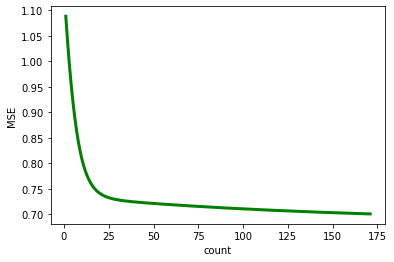

In [ ]:
number_objects, learning_rate, iteration, Width, err_list, y_pred = GD(X1, y, min_alpha=1e-2, max_alpha=7e-2, \
                                                               step_alpha=1e-4, min_iteration=100, \
                                                               max_iteration=3000, step_iteration=100, \
                                                               stoper = 1e-4, count=100)

## Практическое задание

1. Измените функцию calc_logloss так, чтобы нули по возможности не попадали в np.log.
2. Подберите аргументы функции eval_model для логистической регрессии таким образом, чтобы log loss был минимальным.
3. Создайте функцию calc_pred_proba, возвращающую предсказанную вероятность класса 1. На вход подаётся W, который уже посчитан функцией eval_model, и X, на выходе — массив y_pred_proba.
4. Создайте функцию calc_pred, возвращающую предсказанный класс. На вход подаётся W, который уже посчитан функцией eval_model, и X, на выходе — массив y_pred.
5. Посчитайте Accuracy, матрицу ошибок, точность и полноту, а также F1 score.
6. Могла ли модель переобучиться? Почему?

In [ ]:
y_pred_proba1 = calc_pred_proba(Width, X1)
y_pred_proba1

array([0.56487957, 0.61266898, 0.52563263, 0.58917545, 0.56584627,
       0.56038234, 0.55289137, 0.63763507, 0.41708475, 0.46771147,
       0.58151457, 0.44766751, 0.61595279, 0.41180653, 0.60417488,
       0.56444162, 0.52727788, 0.41800555, 0.59505052, 0.5125485 ,
       0.44909213, 0.62083459, 0.60993492, 0.51800528, 0.45572356,
       0.57823595, 0.53979221, 0.43971916, 0.57334226, 0.46627213,
       0.59566906, 0.40234657, 0.43582758, 0.50896124, 0.52552912,
       0.63049396, 0.46840627, 0.55883081, 0.47417175, 0.61862692,
       0.50212504, 0.54264158, 0.42661866, 0.54037458, 0.500195  ,
       0.54002072, 0.48155465, 0.63135486, 0.58532141, 0.52184253,
       0.6227918 , 0.56899496, 0.61951978, 0.49435705, 0.40257857,
       0.52270367, 0.42364506, 0.58960661, 0.45601818, 0.48714059,
       0.4449983 , 0.4013012 , 0.43453917, 0.51363723, 0.59986355,
       0.48224032, 0.53122485, 0.59905623, 0.41284092, 0.60325834,
       0.53980884, 0.61574369, 0.61197475, 0.47350376, 0.51301

In [ ]:
y_pred_proba = loss_function(y_pred_proba1)

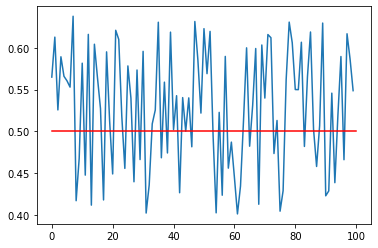

In [ ]:
m = 0.5
line = np.linspace(m, m, num)
skyline = np.linspace(0, num, num)
plt.plot(y_pred_proba1)
plt.plot(skyline, line, 'r-')
plt.show()

In [ ]:
M = accuracy(y, y_pred_proba)
M

0.52

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
A = accuracy_score(y, y_pred_proba)
A

0.52

In [ ]:
C = errors_matrix(y, y_pred_proba)
C

array([[15, 29],
       [19, 37]])

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
N = confusion_matrix(y, y_pred_proba)
N

array([[15, 29],
       [19, 37]], dtype=int64)

In [ ]:
P = precision(C)
P

0.5606060606060606

In [ ]:
R = recall(C)
R

0.6607142857142857

In [ ]:
F = 2 * (P * R) / (P + R)
F

0.6065573770491803

In [ ]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [ ]:
F1 = f1_score(y, y_pred_proba)
F1

0.6065573770491803

In [ ]:
P1 = precision_score(y, y_pred_proba)
P1

0.5606060606060606

In [ ]:
R1 = recall_score(y, y_pred_proba)
R1

0.6607142857142857